<a href="https://colab.research.google.com/github/sunfanglin/WVR/blob/master/ecmwf-ifs-ens-forecast-15-day-0-25-degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickstart: ECMWF IFS ENS forecast, 15 day, 0.25 degree - dynamical.org Zarr
A brief introduction to the ECMWF IFS Ensemble forecast dataset transformed into an analysis-ready, cloud-optimized format by dynamical.org.

Dataset documentation: https://dynamical.org/catalog/ecmwf-ifs-ens-forecast-15-day-0-25-degree/

Dataset licenced [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/) and [ECMWF Terms of Use](https://apps.ecmwf.int/datasets/licences/general/)


In [3]:
# If running locally, follow README.md for simple dependency installation.
# If using Google Colab, run this cell and then restart the notebook.
%pip install "xarray[complete]>=2025.1.2" "zarr>=3.0.8" requests aiohttp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62

In [5]:
import xarray as xr

ds = xr.open_zarr("https://data.dynamical.org/ecmwf/ifs-ens/forecast-15-day-0-25-degree/latest.zarr?email=optional@email.com", chunks=None)
ds

ValueError: unrecognized engine 'zarr' must be one of your download engines: ['h5netcdf', 'scipy', 'store']. To install additional dependencies, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [1]:
# Plot the ensemble traces for one forecast and variable at a point on the earth
plot_ds = ds.sel(init_time="2025-10-02T00", latitude=28.75, longitude=86.70, method="nearest")  # Hilo, Island of Hawai'i
_ = plot_ds["precipitation_surface"].plot(x="valid_time", hue="ensemble_member", add_legend=False)

NameError: name 'ds' is not defined

Text(0.5, 1.0, "Control + Perturbed members for the 2024-08-21 precipitation forecast for Hilo, Hawai'i\n(4 days before Hurricane Hone reached the Big Island)")

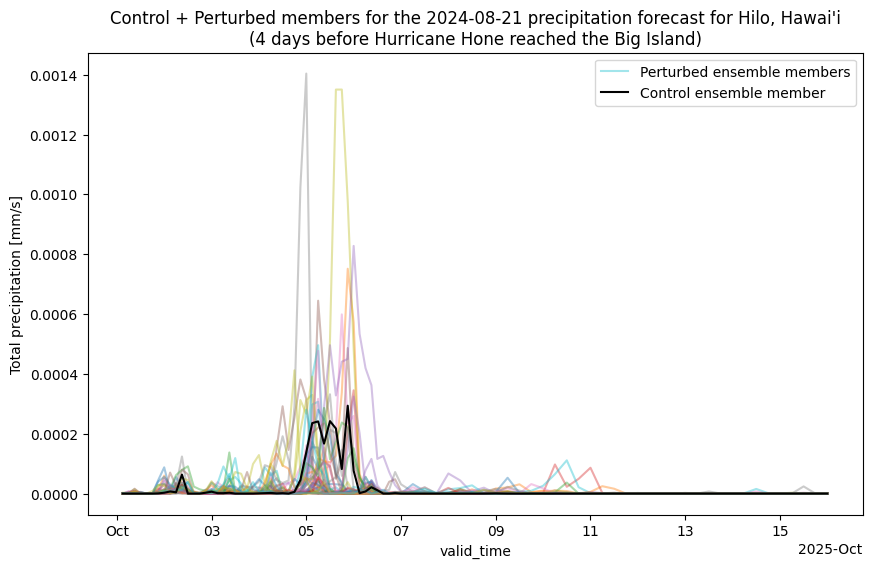

In [4]:
# Getting a little fancier with our plotting: a nicer visualization of the ensemble for that same forecast

import matplotlib.pyplot as plt

plot_ds = ds.sel(init_time="2025-10-01T00", latitude=28.75, longitude=86.70, method="nearest")
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

( # Plot all the perturbed members (ensemble_members 1 through 51) with low opacity
    plot_ds["precipitation_surface"]
    .sel(ensemble_member=slice(1, 51))
    .plot(x="valid_time", hue="ensemble_member", ax=ax, alpha=0.4, label="Perturbed ensemble members")
)
( # Plot the control (ensemble_member 0) on top in black
    plot_ds["precipitation_surface"]
    .sel(ensemble_member=0)
    .plot(x="valid_time", ax=ax, color="black", label="Control ensemble member")
)

# Clean up legend, use one legend entry for all 50 perturbed members
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-2:], labels[-2:])
ax.set_title("Control + Perturbed members for the 2024-08-21 precipitation forecast for Hilo, Hawai'i\n(4 days before Hurricane Hone reached the Big Island)")

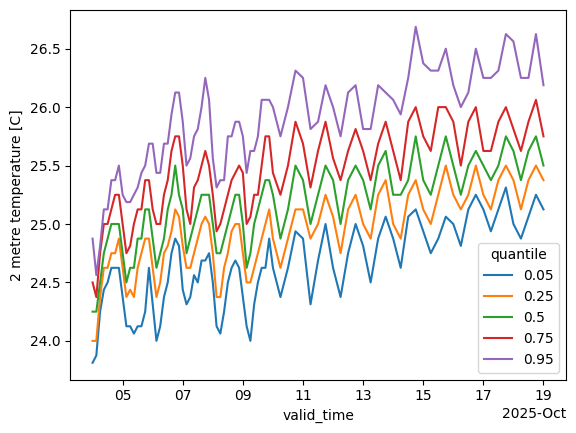

In [6]:
# Plot a summary of the ensemble distribution using quantiles
plot_ds = ds.sel(init_time="2025-10-04T00", latitude=0, longitude=0)
(
    plot_ds["temperature_2m"]
    .quantile([0.05, 0.25, 0.5, 0.75, 0.95], dim="ensemble_member")
    .plot(x="valid_time", hue="quantile")
)

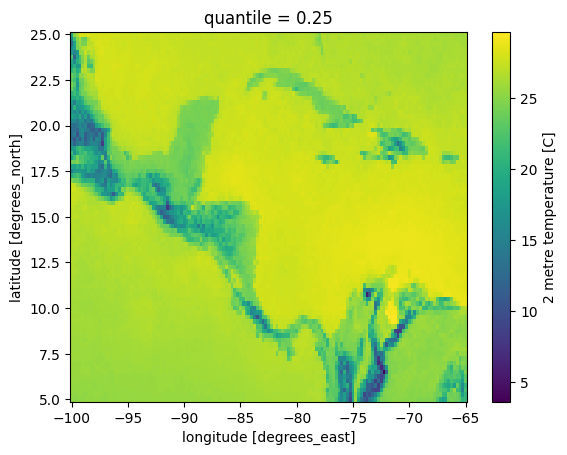

In [7]:
# Calculate a quantile across ensemble members and display the result as a map
(
    ds["temperature_2m"]
    .sel(init_time="2025-10-01T00")
    .sel(lead_time="7d")
    .sel(latitude=slice(25, 5), longitude=slice(-100, -65)) # Central America and the Caribbean
    .quantile(0.25, dim="ensemble_member") # 25% chance it gets colder than this
    .plot()
);

Text(0.5, 1.0, 'Ensemble standard deviation 2 meter temperature [C]')

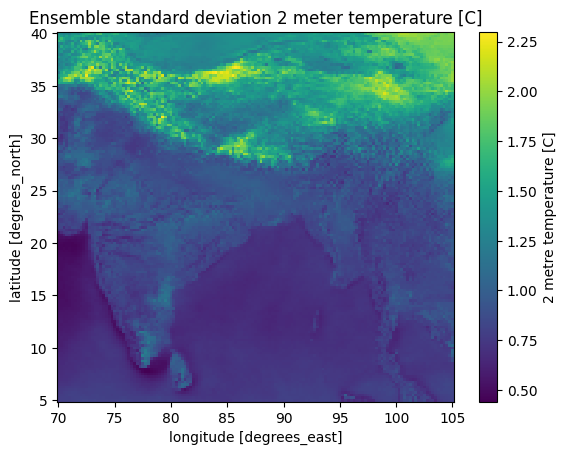

In [8]:
# Highlight areas of uncertainty in a 15 day temperature forecast

plot_ds = ds.sel(init_time="2025-10-04T00", latitude=slice(40, 5), longitude=slice(70, 105))

# Standard deviation across ensemble members to highlight regions of forecast uncertainty
plot_ds["temperature_2m"].std(dim="ensemble_member").mean(dim="lead_time").plot()
plt.title(f"Ensemble standard deviation 2 meter temperature [{ds['temperature_2m'].attrs['units']}]")